In [130]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn import preprocessing
##import tensorflow as tf
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from sklearn.metrics import accuracy_score, classification_report


### Read the data from github repository and drop uniqe values from it, also combining colunms which are related each other

In [131]:
url = 'smoking.csv'
df = pd.read_csv(url)
pd.set_option('display.max_columns', None)
##missing_count = df.isna().sum()  0
##print(missing_count)   0

#No need id because it is unique to everyone
df = df.sort_values(by = 'ID')
df = df.drop(['ID'], axis = 1)
df = df.drop(['gender'], axis = 1)
## No need for oral column since every value is 1
df = df.drop(['oral'], axis = 1)

## Encode
label_encoder = preprocessing.LabelEncoder()
df['tartar'] = label_encoder.fit_transform(df['tartar'])

### Fix the blind values for eyesight, then combine eyesight

In [132]:
## Combine left and right eyesight and hearing
columns_to_replace = ['eyesight(left)', 'eyesight(right)', 'hearing(left)', 'hearing(right)']
df[columns_to_replace] = df[columns_to_replace].replace(9.9, 0)

df['eyesight'] = df[['eyesight(left)', 'eyesight(right)']].mean(axis=1)
df['hearing'] = df[['hearing(left)', 'hearing(right)']].mean(axis=1)
df = df.drop(['eyesight(left)', 'eyesight(right)','hearing(left)', 'hearing(right)'],axis = 1)

In [133]:
#Describe data to look is there any outlayer values
df.describe()

,age,height(cm),weight(kg),waist(cm),systolic,relaxation,fasting blood sugar,Cholesterol,triglyceride,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries,tartar,smoking,eyesight,hearing
count,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000
mean,44.182917,164.649321,65.864936,82.046418,121.494218,76.004830,99.312325,196.901422,126.665697,57.290347,114.964501,14.622592,1.087212,0.885738,26.182935,27.036037,39.952201,0.213334,0.555556,0.367288,0.993679,1.025865
std,12.071418,9.194597,12.820306,9.274223,13.675989,9.679278,20.795591,36.297940,71.639817,14.738963,40.926476,1.564498,0.404882,0.221524,19.355460,30.947853,50.290539,0.409665,0.496908,0.482070,0.301393,0.137929
min,20.000000,130.000000,30.000000,51.000000,71.000000,40.000000,46.000000,55.000000,8.000000,4.000000,1.000000,4.900000,1.000000,0.100000,6.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,40.000000,160.000000,55.000000,76.000000,112.000000,70.000000,89.000000,172.000000,74.000000,47.000000,92.000000,13.600000,1.000000,0.800000,19.000000,15.000000,17.000000,0.000000,0.000000,0.000000,0.800000,1.000000
50%,40.000000,165.000000,65.000000,82.000000,120.000000,76.000000,96.000000,195.000000,108.000000,55.000000,113.000000,14.800000,1.000000,0.900000,23.000000,21.000000,25.000000,0.000000,1.000000,0.000000,1.000000,1.000000
75%,55.000000,170.000000,75.000000,88.000000,130.000000,82.000000,104.000000,220.000000,160.000000,66.000000,136.000000,15.800000,1.000000,1.000000,28.000000,31.000000,43.000000,0.000000,1.000000,1.000000,1.200000,1.000000
max,85.000000,190.000000,135.000000,129.000000,240.000000,146.000000,505.000000,445.000000,999.000000,618.000000,1860.000000,21.100000,6.000000,11.600000,1311.000000,2914.000000,999.000000,1.000000,1.000000,1.000000,2.000000,2.000000


### Pieplot

<AxesSubplot: ylabel='smoking'>

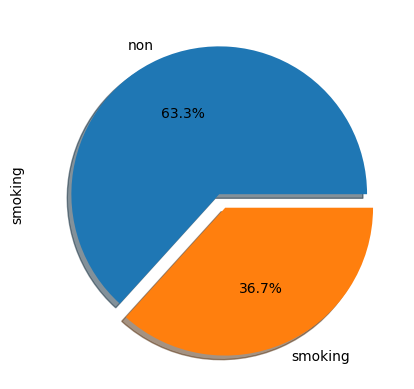

In [134]:

df['smoking'].value_counts().plot.pie(explode = [0,0.1], autopct="%1.1f%%",labels=["non","smoking"], shadow=True)

## CatPlot

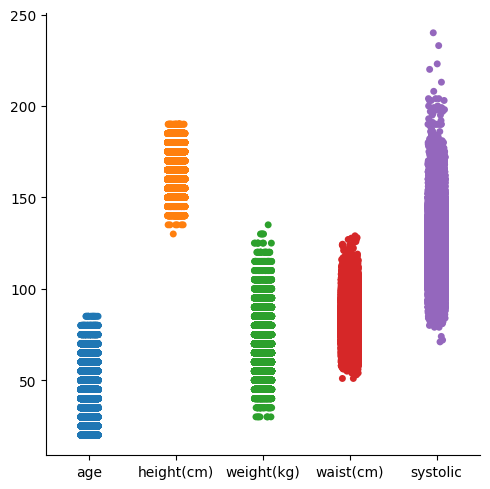

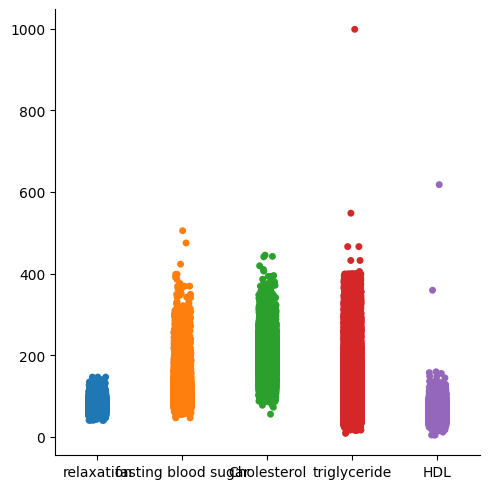

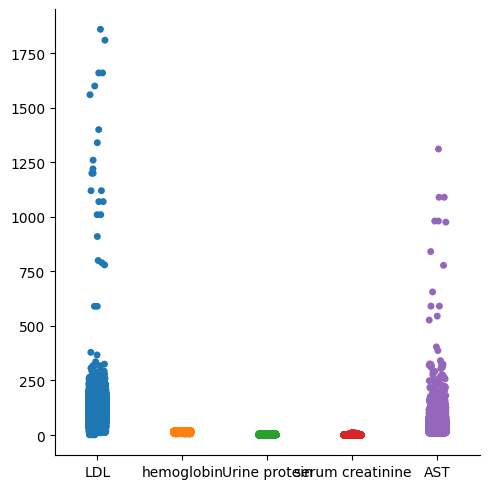

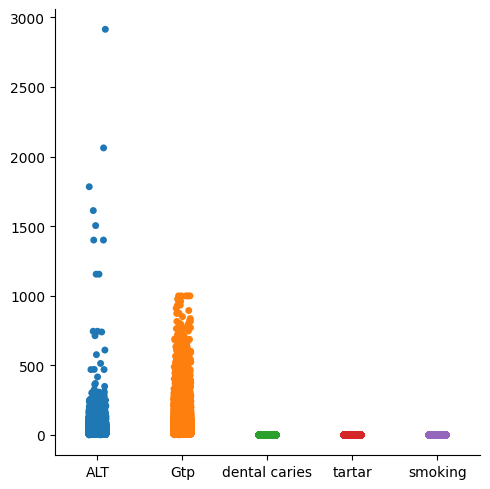

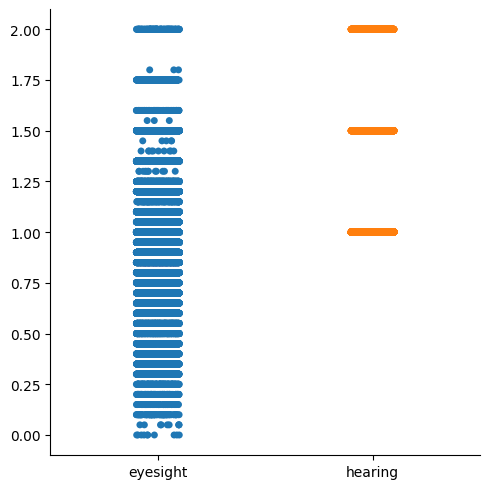

In [135]:
#CatPlots
sns.catplot(df.iloc[:, 0:5])
sns.catplot(df.iloc[:, 5:10])
sns.catplot(df.iloc[:, 10:15])
sns.catplot(df.iloc[:, 15:20])
sns.catplot(df.iloc[:, 20:22])

## BoxPlot

## HeatMap

<AxesSubplot: >

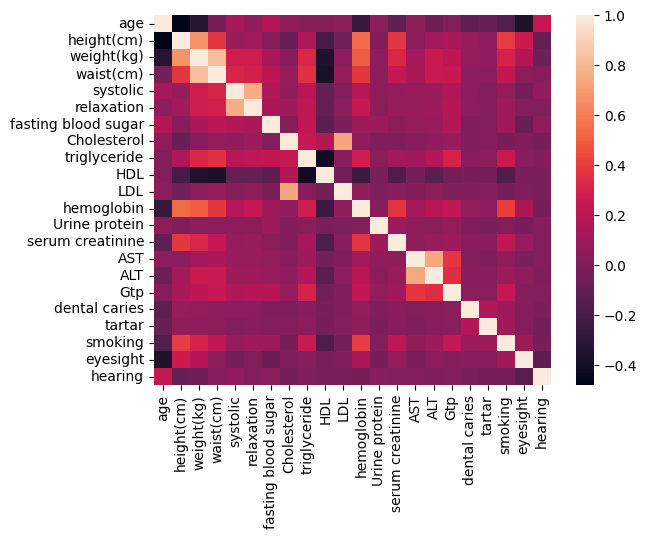

In [136]:
#HeatMap
corelation=df.corr()
sns.heatmap(corelation)

#Get rid of outlayer

In [137]:
# Make max values like this beacuse of outlayers still exist and we cant delete all of them, there could be too much data loss  got the values from https://www.kaggle.com/code/m000sey/ps-3-24-boosting-ensemble-w-nn
#df['Gtp'] = np.clip(df['Gtp'], 0, 300)
#df['LDL'] = np.clip(df['LDL'], 0, 250)
#df['ALT'] = np.clip(df['ALT'], 0, 150)
#df['AST'] = np.clip(df['AST'], 0, 100)
#df['serum creatinine'] = np.clip(df['serum creatinine'], 0, 2)
#df['fasting blood sugar'] = np.clip(df['fasting blood sugar'], 0, 175)
#df['triglyceride'] = np.clip(df['triglyceride'], 0, 400)
#df['hemoglobin'] = np.clip(df['hemoglobin'], 8, 20)

In [138]:
# using the Interquartile Range (IQR) method

num_columns = df.shape[0]
new_df = df.copy()
print("Sample size before iqr:", num_columns)

columns_of_interest = ['ALT', 'AST', 'fasting blood sugar', 'triglyceride', 'HDL', 'LDL', 'Gtp', 'systolic']

# Calculating IQR for each specified column
for column in columns_of_interest:
    q1, q3 = np.percentile(new_df[column], [25, 75])
    iqr = q3 - q1
    lower_bound = q1 - (1.5 * iqr)  
    upper_bound = q3 + (1.5 * iqr)
    
    # Filtering outliers for the current column in the new DataFrame
    outliers_mask = (new_df[column] < lower_bound) | (new_df[column] > upper_bound)
    new_df = new_df[~outliers_mask]

num_columns = new_df.shape[0]
print("Sample size after iqr", num_columns)
# ss 33073 when using 2* iqr_value
# ss 36000 3*
# ss 37564 4*
# ss 38215 5*

Sample size before iqr: 55692
Sample size after iqr 40123


In [139]:
from imblearn.combine import SMOTEENN
Y = new_df['smoking']
X = new_df.drop(['smoking'], axis=1)
## Using SMOTE ENN

# Initialize the SMOTEENN object
smoteenn = SMOTEENN(sampling_strategy=0.785,random_state=42)


X, Y = smoteenn.fit_resample(X, Y)

balanced_df = pd.concat([pd.DataFrame(X), pd.DataFrame(Y)], axis=1)
scaler = StandardScaler()
X_standard = pd.DataFrame(scaler.fit_transform(X))
scaler2 = MinMaxScaler()
X_min_max = pd.DataFrame(scaler2.fit_transform(X))


In [140]:
balanced_df.describe()

,age,height(cm),weight(kg),waist(cm),systolic,relaxation,fasting blood sugar,Cholesterol,triglyceride,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries,tartar,eyesight,hearing,smoking
count,30758.000000,30758.000000,30758.000000,30758.000000,30758.000000,30758.000000,30758.000000,30758.000000,30758.000000,30758.000000,30758.000000,30758.000000,30758.000000,30758.000000,30758.000000,30758.000000,30758.000000,30758.000000,30758.000000,30758.000000,30758.000000,30758.000000
mean,43.670882,163.965700,63.524481,80.086472,119.366690,74.666261,94.581605,194.381596,108.602762,58.157379,114.548784,14.446989,1.071365,0.869130,22.135955,20.202802,25.396199,0.175564,0.508258,0.995634,1.022364,0.501431
std,11.614806,9.301772,11.875196,8.628354,12.320655,8.777087,9.491432,32.286022,51.631508,13.047479,29.751225,1.567578,0.338367,0.193765,5.185010,8.665275,13.116772,0.380455,0.499940,0.288589,0.125673,0.500006
min,20.000000,130.000000,30.000000,54.000000,82.000000,40.000000,68.000000,77.000000,8.000000,21.000000,29.000000,4.900000,1.000000,0.100000,7.000000,1.000000,3.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,39.000000,155.000000,55.000000,74.000000,110.000000,69.000000,88.000000,171.000000,69.000000,48.425811,93.452476,13.400000,1.000000,0.700000,18.234565,14.000000,15.168805,0.000000,0.000000,0.800000,1.000000,0.000000
50%,40.000000,165.000000,63.000000,80.000000,119.000000,75.000000,94.000000,193.000000,97.035252,57.000000,113.000000,14.630120,1.000000,0.900000,21.262577,18.000000,21.690294,0.000000,1.000000,1.000000,1.000000,1.000000
75%,50.000000,170.000000,70.000000,86.000000,128.000000,80.000000,100.000000,216.000000,137.000000,66.844117,134.689697,15.600000,1.000000,1.000000,25.000000,24.000000,32.000000,0.000000,1.000000,1.200000,1.000000,1.000000
max,85.000000,190.000000,120.000000,121.000000,157.000000,121.000000,124.000000,336.000000,269.000000,95.000000,200.000000,20.000000,6.000000,10.000000,39.000000,55.000000,66.000000,1.000000,1.000000,2.000000,2.000000,1.000000


### Scaled CatPlot


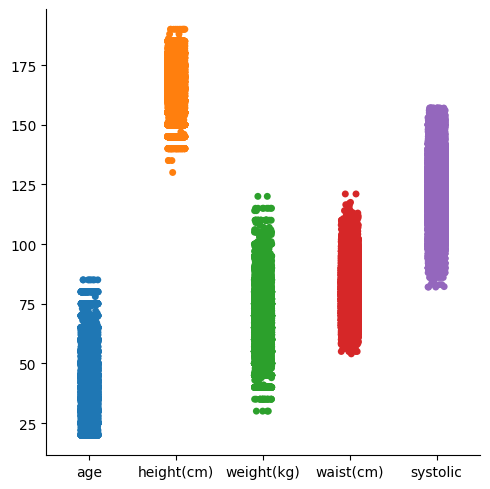

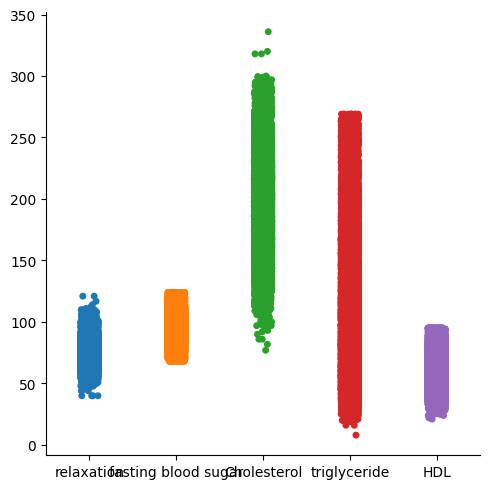

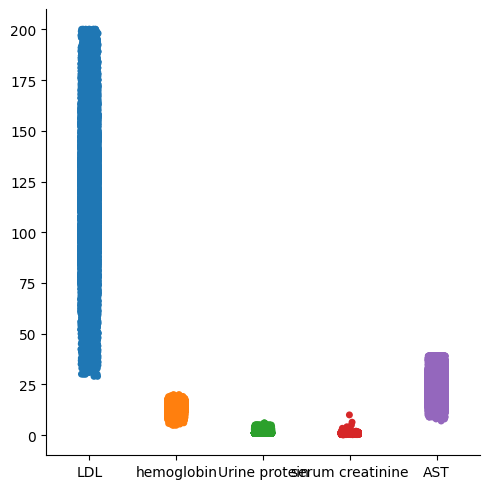

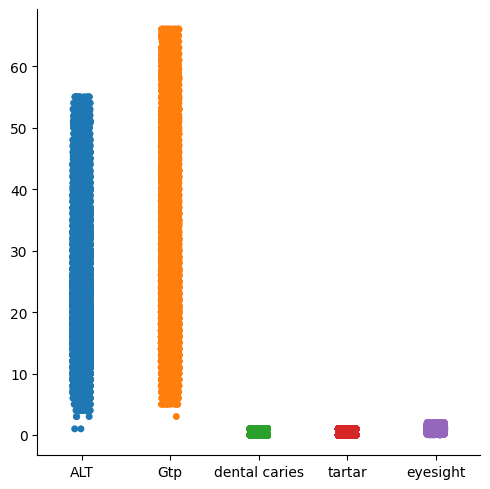

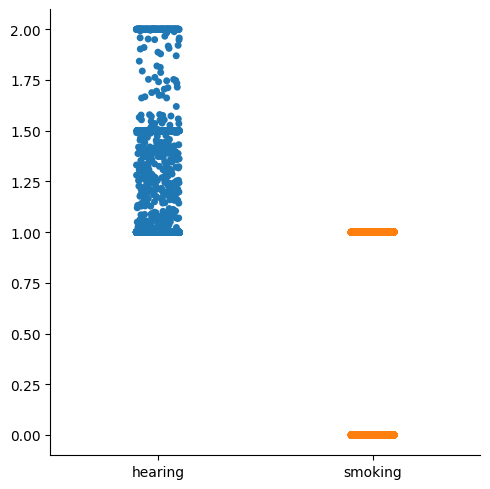

In [141]:
#CatPlot
#CatPlots
sns.catplot(balanced_df.iloc[:, 0:5])
sns.catplot(balanced_df.iloc[:, 5:10])
sns.catplot(balanced_df.iloc[:, 10:15])
sns.catplot(balanced_df.iloc[:, 15:20])
sns.catplot(balanced_df.iloc[:, 20:22])

### Scaled BoxPlot


### Scaled HeatMap

<AxesSubplot: >

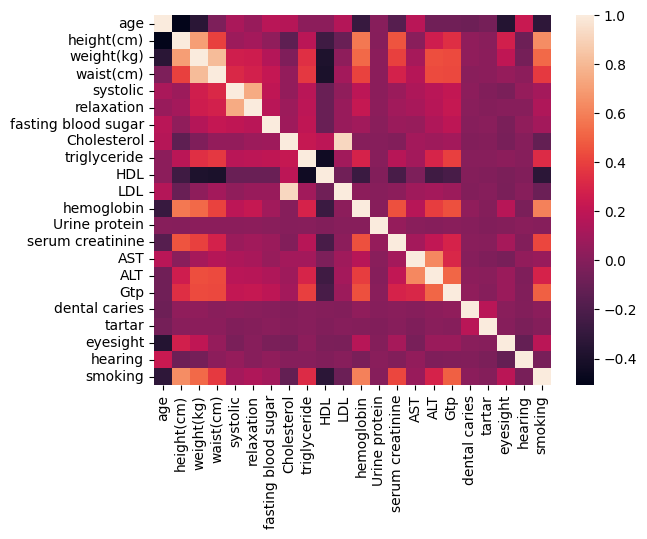

In [142]:
#HeatMap
corelation=balanced_df.corr()
sns.heatmap(corelation)

<AxesSubplot: ylabel='smoking'>

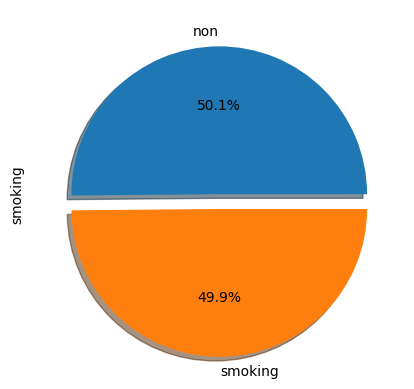

In [143]:

balanced_df['smoking'].value_counts().plot.pie(explode = [0,0.1], autopct="%1.1f%%",labels=["non","smoking"], shadow=True)

# FEATURE SELECTION

In [144]:
from sklearn.feature_selection import RFE
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import Lasso
from sklearn.feature_selection import mutual_info_classif
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score
from sklearn.model_selection import train_test_split


# Lets find how many features are needed using a loop and 5 different feature selection method
feature_count = 12 # will go to 8
RFC = RandomForestClassifier(n_estimators=50)
model_list = {
    'Logistic': {"f1": 0, "precision": 0, "recall": 0, "roc_auc": 0, "feature_count": 0},
    'chi2': {"f1": 0, "precision": 0, "recall": 0, "roc_auc": 0, "feature_count": 0},
    'Lasso': {"f1": 0, "precision": 0, "recall": 0, "roc_auc": 0, "feature_count": 0},
    'mutual': {"f1": 0, "precision": 0, "recall": 0, "roc_auc": 0, "feature_count": 0},
    'PCA': {"f1": 0, "precision": 0, "recall": 0, "roc_auc": 0, "feature_count": 0},
    'RFC': {"f1": 0, "precision": 0, "recall": 0, "roc_auc": 0, "feature_count": 0},
    'KNN': {"f1": 0, "precision": 0, "recall": 0, "roc_auc": 0, "feature_count": 0},
    'Stacking': {"f1": 0, "precision": 0, "recall": 0, "roc_auc": 0, "feature_count": 0},
    'Max_voting': {"f1": 0, "precision": 0, "recall": 0, "roc_auc": 0, "feature_count": 0},
    'Deep_learning': {"f1": 0, "precision": 0, "recall": 0, "roc_auc": 0, "feature_count": 0}
}

for key in model_list:
    model_list[key]['accuracy'] = 0

def add_list(model_name, test_data, pred_data, feature_count):

  precision = precision_score(test_data, pred_data)
  recall = recall_score(test_data, pred_data)
  f1 = f1_score(test_data, pred_data)

  roc_auc = roc_auc_score(test_data, pred_data)
  accuracy = accuracy_score(test_data, pred_data)

  # Assign these values to the model dictionary
  model_list[model_name]['precision'] = precision
  model_list[model_name]['recall'] = recall
  model_list[model_name]['f1'] = f1
  model_list[model_name]['feature_count'] = feature_count
  model_list[model_name]['roc_auc'] = roc_auc
  model_list[model_name]['accuracy'] = accuracy     


### Lasso

In [145]:
#Only lasso is applied once
lasso = Lasso(alpha=0.0001)
lasso.fit(X_standard, Y)

# Get feature which does not have coeffient 0
selected_features = X_standard.columns[lasso.coef_ != 0]
X_lasso = X_standard[selected_features]
X_train_lasso, X_test_lasso, y_train_lasoo, y_test_lasso = train_test_split(X_lasso, Y, test_size=0.2, random_state=42)
RFC.fit(X_train_lasso, y_train_lasoo)


y_pred_lasso = RFC.predict(X_test_lasso)

add_list('Lasso', y_test_lasso, y_pred_lasso, X_lasso.shape[1])

### Chi2 and mutual_info with SelectKBest

In [146]:
def RFC_train_test_SelectKBest(method, feature_count, X, Y, name):
    k_best = SelectKBest(score_func=method, k=feature_count)
    X_selected = k_best.fit_transform(X, Y)
    X_train, X_test, y_train, y_test = train_test_split(X_selected, Y, test_size=0.2, random_state=42)

    RFC.fit(X_train, y_train)
    y_pred = RFC.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    if accuracy > model_list[name]['accuracy']:
        add_list(name, y_test, y_pred, feature_count)
    


feature_count = 21
while feature_count > 15:
    RFC_train_test_SelectKBest(chi2, feature_count, X_min_max, Y, 'chi2')
    RFC_train_test_SelectKBest(mutual_info_classif, feature_count, X, Y, 'mutual')
    feature_count -= 1


### PCA


In [147]:
from sklearn.model_selection import KFold
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
#PCA
# Apply PCA
# chi2 gives best performance at feature numberr 16 so we will use 16 feature end of the code from herek_best = SelectKBest(score_func=method, k=feature_count)
k_best = SelectKBest(score_func=chi2, k=17)
X_PCA = k_best.fit_transform(X_min_max, Y)



# Initialize SVM classifier
pipe = make_pipeline(PCA(n_components=5), RFC)

# Specify the number of folds for K-fold cross-validation
k_folds = 5

# Create a KFold object
kf = KFold(n_splits=k_folds, shuffle=True, random_state=42)

# Perform K-fold cross-validatio
accuracy_scores=[]
for train_index, test_index in kf.split(X_PCA):
    
    X_train, X_test = X_PCA[train_index], X_PCA[test_index]
    y_train, y_test = Y.to_numpy()[train_index], Y.to_numpy()[test_index]
    
    # Train the model on the training fold
    pipe.fit(X_train, y_train)
    
    # Predict on the validation fold
    predictions = pipe.predict(X_test)
    
    accuracy = accuracy_score(y_test, predictions)

    if accuracy >= model_list['PCA']['accuracy']:
        add_list('PCA', y_test, predictions, 5)



### RFC

In [148]:

def RFC_train_test_RFC(X, Y, feature_count):
    RFC.fit(X, Y)

    # Access feature importances
    feature_importances = RFC.feature_importances_

    # Sort the features
    sorted_feature_indices = feature_importances.argsort()[::-1]

    selected_feature_indices = sorted_feature_indices[:feature_count]

    # Select specified features within cuDF
    X_selected = X_standard.iloc[:, selected_feature_indices]

    X_train, X_test, y_train, y_test = train_test_split(X_selected, Y, test_size=0.2, random_state=42)
    RFC.fit(X_train, y_train)
    y_pred = RFC.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    if accuracy > model_list['RFC']['accuracy']:
        add_list('RFC', y_test, y_pred, feature_count)

feature_count = 15
while feature_count < 20:
    RFC_train_test_RFC(X_standard, Y, feature_count)
    feature_count += 1


In [149]:
def logistic_chi(method, feature_count, X, Y, LR):
    k_best = SelectKBest(score_func=method, k=feature_count)
    X_selected = k_best.fit_transform(X, Y)
    X_train, X_test, y_train, y_test = train_test_split(X_selected, Y, test_size=0.2, random_state=42)

    LR.fit(X_train, y_train)
    y_pred = LR.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    if accuracy > model_list['Logistic']['accuracy']:
        add_list('Logistic', y_test, y_pred, feature_count)

### Logisctic Reggression

In [150]:
#Logistic Regression Here
from sklearn.linear_model import LogisticRegression
X_train, X_test, y_train, y_test = train_test_split(X_standard, Y, test_size=0.2, random_state=42)
Logistic_model = LogisticRegression(random_state=42,max_iter=10000)



feature_count = 21
while feature_count > 15:
    logistic_chi(chi2, feature_count, X_min_max, Y,Logistic_model)
    feature_count -= 1


In [151]:
# chi2 gives best performance at feature numberr n feature end of the code from herek_best = SelectKBest(score_func=method, k=feature_count)
k_best = SelectKBest(score_func=chi2, k=model_list['chi2']['feature_count'])
X_standard = k_best.fit_transform(X_min_max, Y)

### KNN


In [152]:
#KNN here  
from sklearn.neighbors import KNeighborsClassifier

X_train, X_test, y_train, y_test = train_test_split(X_standard, Y, test_size=0.2, random_state=42)    
accuracy_knn = []
for i in range(5,25):
  knn = KNeighborsClassifier(n_neighbors=i)
  knn.fit(X_train,y_train)
  pred_i = knn.predict(X_test)
  accuracy_knn.append(accuracy_score(y_test, pred_i))

  accuracy = accuracy_score(y_test, pred_i)


  if accuracy >= model_list['KNN']['accuracy']:
    add_list('KNN', y_test, pred_i, i)      

#Bad result beacuse of imbalanced data here!

### Max voting

In [153]:
#Max voting here
from sklearn.ensemble import VotingClassifier

DTC = DecisionTreeClassifier()
GBC = GradientBoostingClassifier()
LR = LogisticRegression(max_iter=1000)
NB = GaussianNB()
KNN = KNeighborsClassifier(n_neighbors=13)

final_model = VotingClassifier( estimators=[ ('dt', DTC ), ('rf', RFC), ('lr', LR), ('gb', GBC),('NB', NB), ('KNN', KNN) ])
 
# training all the model on the train dataset
x_train, x_test, y_train, y_test = train_test_split(X_standard, Y, test_size=0.2, random_state=42)
final_model.fit(x_train, y_train)
 
# predicting the output on the test dataset
pred_final = final_model.predict(x_test)
 
add_list('Max_voting', y_test, pred_final, 16)


### Stacking

In [154]:



#Stacking Here
from sklearn.ensemble import GradientBoostingClassifier, StackingClassifier
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier, ExtraTreesClassifier
base_models = [
    ('logistic', LogisticRegression(max_iter=500)),
    ('random_forest', RandomForestClassifier(n_estimators=75)),
    ('gradient_boosting', GradientBoostingClassifier(n_estimators=75)),
    ('knn', KNeighborsClassifier(n_neighbors=model_list['KNN']['feature_count'])),
    ('Extra', ExtraTreesClassifier(n_estimators=75)),
    ('SVM', SVC(kernel='linear', C=1.0, cache_size=1000)), 
    ('adaboost', AdaBoostClassifier(n_estimators=70))  
]

stacked_model = StackingClassifier(estimators = base_models, final_estimator=RandomForestClassifier())
x_train, x_test, y_train, y_test = train_test_split(X_standard, Y, test_size=0.2, random_state=42)


# Train the stacking model
stacked_model.fit(x_train, y_train) ## replaced here with resampled smoteen data before smoteen

# Make predictions
stacked_predictions = stacked_model.predict(x_test)

add_list('Stacking', y_test, stacked_predictions, 16)


### Deep Learning

In [155]:
#Deep Learning Here

In [156]:
best_method = None
best_acc = 0

for method, info in model_list.items():
    acc = info['accuracy']
    if acc > best_acc:
        best_method = method
        best_acc = acc
    print(f"{method} has accuracy={info['accuracy']:.4f} roc_auc={info['roc_auc']:.4f}, f1={info['f1']:.4f}, precision={info['precision']:.4f}, recall={info['recall']:.4f}, feature_count={info['feature_count']}")

print(f"The best feature selection method is '{best_method}' with an accuracy of {best_acc:.4f} and feature count {model_list[best_method]['feature_count']}")

Logistic has accuracy=0.8742 roc_auc=0.8745, f1=0.8760, precision=0.8528, recall=0.9006, feature_count=18
chi2 has accuracy=0.9460 roc_auc=0.9464, f1=0.9470, precision=0.9189, recall=0.9770, feature_count=18
Lasso has accuracy=0.9442 roc_auc=0.9447, f1=0.9454, precision=0.9155, recall=0.9773, feature_count=20
mutual has accuracy=0.9468 roc_auc=0.9472, f1=0.9477, precision=0.9219, recall=0.9750, feature_count=19
PCA has accuracy=0.9190 roc_auc=0.9191, f1=0.9201, precision=0.9053, recall=0.9354, feature_count=5
RFC has accuracy=0.9467 roc_auc=0.9470, f1=0.9474, precision=0.9237, recall=0.9723, feature_count=15
KNN has accuracy=0.9018 roc_auc=0.9025, f1=0.9057, precision=0.8611, recall=0.9552, feature_count=5
Stacking has accuracy=0.9553 roc_auc=0.9555, f1=0.9553, precision=0.9432, recall=0.9677, feature_count=16
Max_voting has accuracy=0.9021 roc_auc=0.9025, f1=0.9039, precision=0.8775, recall=0.9318, feature_count=16
Deep_learning has accuracy=0.0000 roc_auc=0.0000, f1=0.0000, precision

In [157]:
model_df = pd.DataFrame.from_dict(model_list, orient='index')
model_df = model_df.drop(['feature_count'],axis=1)

# Print the DataFrame
print(model_df)

                     f1  precision    recall   roc_auc  accuracy
Logistic       0.876041   0.852822  0.900560  0.874517  0.874187
chi2           0.947016   0.918860  0.976951  0.946421  0.946034
Lasso          0.945373   0.915484  0.977280  0.944659  0.944246
mutual         0.947672   0.921856  0.974975  0.947199  0.946847
PCA            0.920115   0.905303  0.935421  0.919088  0.919038
RFC            0.947385   0.923678  0.972341  0.947005  0.946684
KNN            0.905713   0.861086  0.955219  0.902489  0.901821
Stacking       0.955306   0.943196  0.967731  0.955455  0.955299
Max_voting     0.903865   0.877519  0.931841  0.902517  0.902146
Deep_learning  0.000000   0.000000  0.000000  0.000000  0.000000


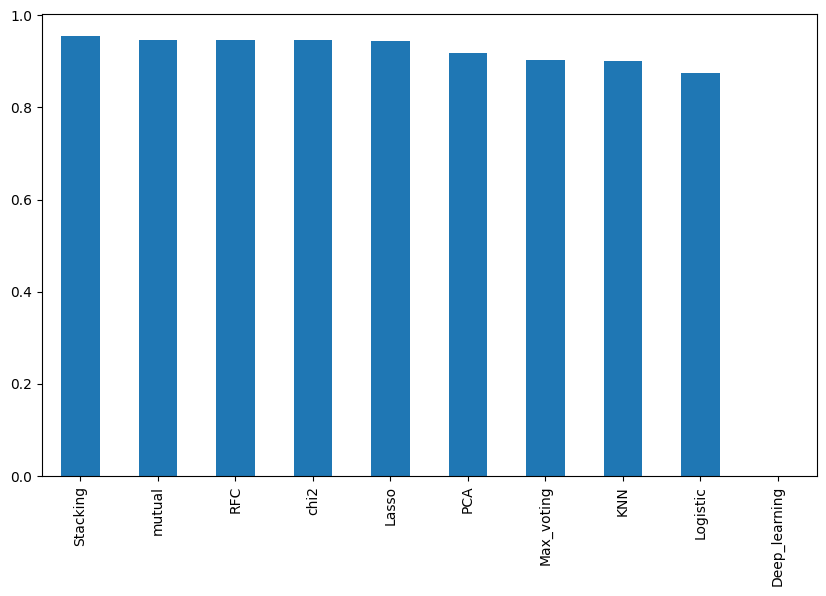

In [158]:
model_df = model_df.sort_values(by='accuracy', ascending=False)
plt = model_df['accuracy'].plot(kind='bar', figsize=(10, 6))

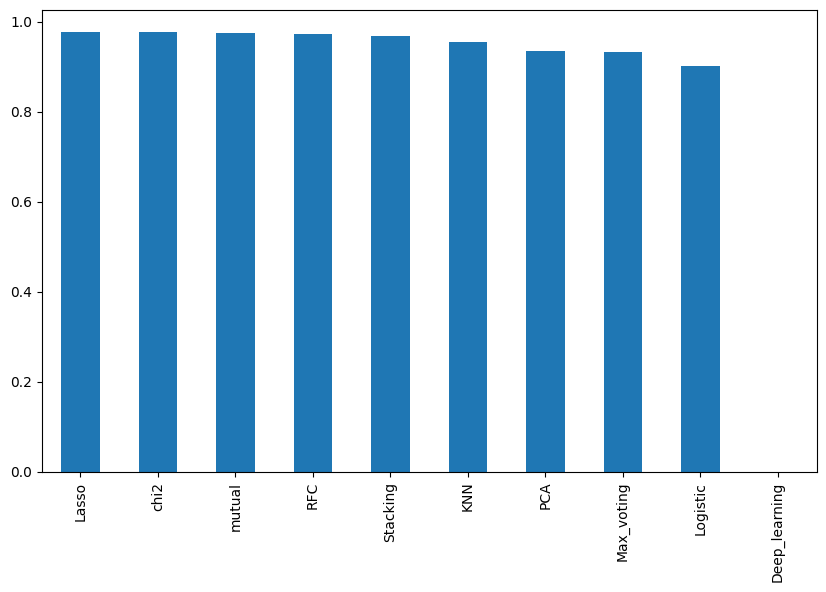

In [159]:
model_df = model_df.sort_values(by='recall', ascending=False)
plt = model_df['recall'].plot(y='Recall score',kind='bar', figsize=(10, 6))

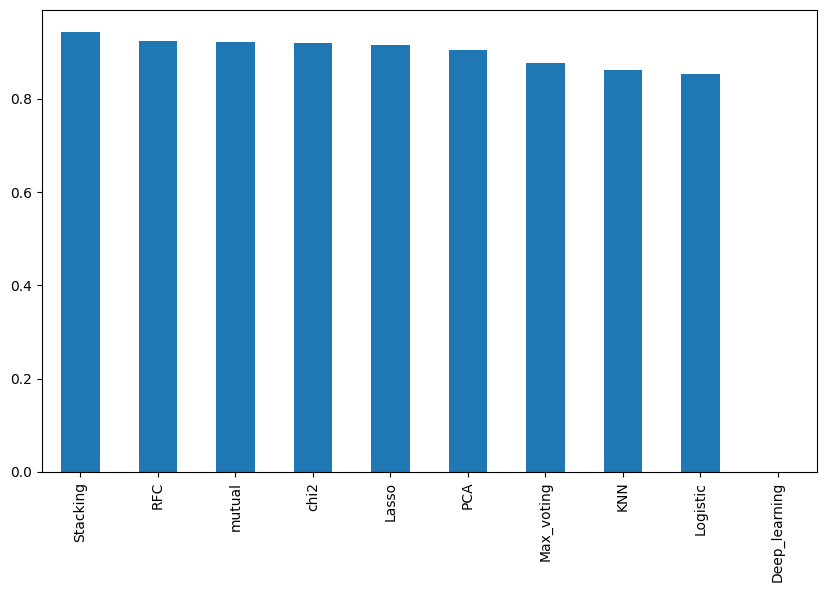

In [160]:
model_df = model_df.sort_values(by='precision', ascending=False)
plt = model_df['precision'].plot(kind='bar', figsize=(10, 6))

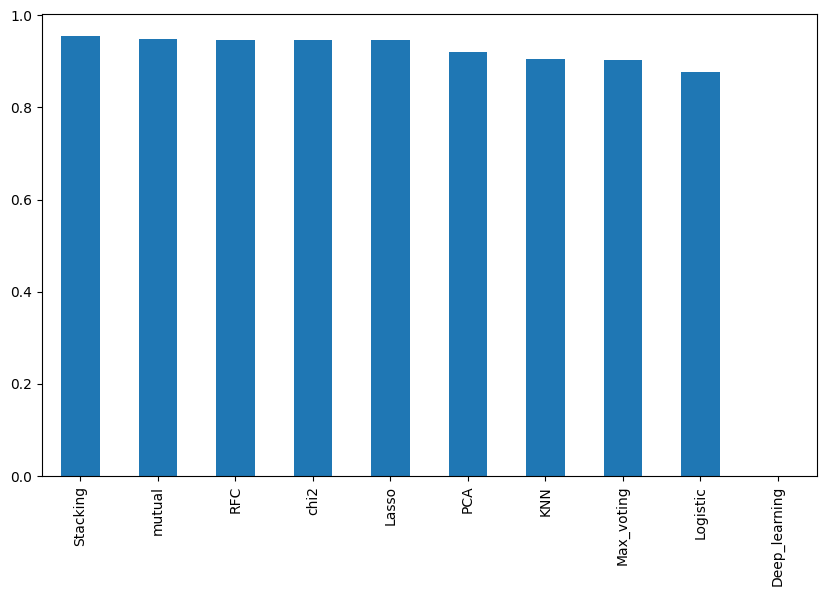

In [161]:
model_df = model_df.sort_values(by='f1', ascending=False)
plt = model_df['f1'].plot(kind='bar', figsize=(10, 6))

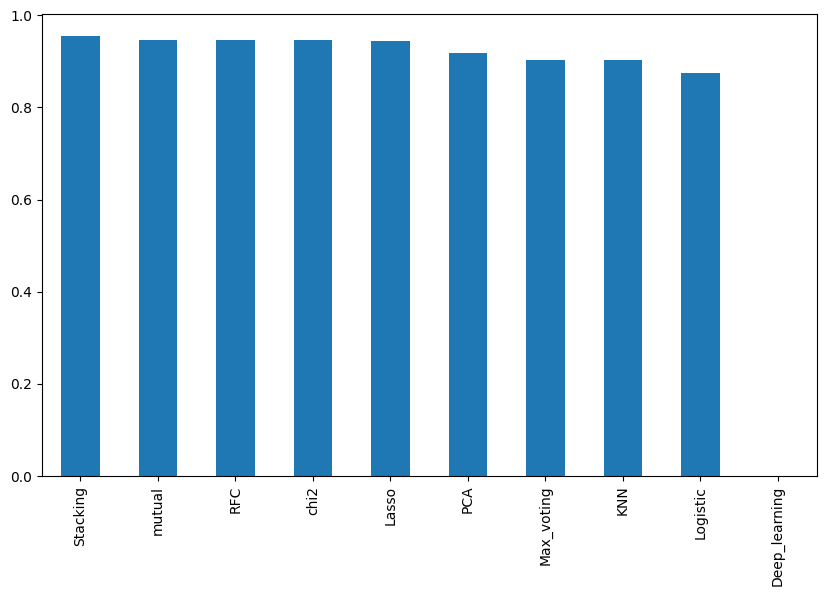

In [162]:
model_df = model_df.sort_values(by='roc_auc', ascending=False)
plt = model_df['roc_auc'].plot(kind='bar', figsize=(10, 6))